<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ANÁLISIS DE VIDEOJUEGOS 2016


## Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

## 1 Carga de datos


In [1]:
#Importar librerias para el procesamiento de los datos

import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
from scipy.stats import ttest_ind

In [6]:
# Carga de archivos
games = pd.read_csv('D:\\TripleTen\\Sprint 6\\videogames-analysis\\games.csv')


In [7]:
# Obtener información de los datos
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
#Visualización de los datos
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


A primera vista con la visuaización de los datos, se puede observar que la mayoria de las columnas de nuestro archivo tiene suficientes datos para realizar un correcto procesamiento. Se observa algunos errores que deben de ser corregidos, por ejemplo, los títulos de las columnas se encuentran con la primera letra en mayúscula, lo cual puede generar un problema en el procesamiento. También se observa que los datos para la columna 'year_of_release' es de tipo float, lo cual seria espereado que fuera de tipo int, a tratarse de datos discretos, así como en la columna de 'user_score' es de tipo str y se trata de una variable que debería de ser tipo float.

Se observa que para los datos del tipo cuantitativo, se tiene una gran cantidad de datos nulos, lo cual puede ser un gran reto el tratar estos, pues se tiene un poco más del 50% de datos ausente y el llenado de estos con valores estadísticos puede alterar nuestros resultados finales

## 1.1 Preprocesamiento de los datos

In [ ]:
#Cambiar nombres de columnas a minúsculas
games.columns = games.columns.str.lower()

#Verificar cambios
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
#Revisar duplicados
games.duplicated().sum()

0

Para el manejo de los datos nulos, se obtará por rellenar las variables categóricas como 'unkown' para no perder información de nuestro dataset original.

In [ ]:
#Llenado de valores nulos en las variables categóricas
games['name'] = games['name'].fillna('unkown')
games['genre'] = games['genre'].fillna('unkown')
games['rating'] = games['rating'].fillna('unkown')

#Verificar que los cambios sean correctos
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Para la variable 'year_of_release' se obtará por eliminar las filas donde haya datos ausentes en esta columna, ya que al ser pocos datos no nulos, hay mucho riesgo de perder demasiada información del df.

In [ ]:
#Eliminar filas con valores ausentes en year_of_release

games = games.dropna(subset=['year_of_release'])

#Verificar correcta eliminación
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16446 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [ ]:
#Convertir los tipos de datos
games['year_of_release'] = games['year_of_release'].astype(int)

#Uso de pd.to_numeric con errors = 'coerce' para ignorar los valores nulos
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

#Verificar que los cambios sean correctos
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## 1.2 Enriquecer datos

In [ ]:
#Crear columna de ventas totales
games['total_sales'] = (games['na_sales'] + 
                        games['eu_sales'] + 
                        games['jp_sales'] + 
                        games['other_sales'])

In [ ]:
#Crear copias del dataframe para análisis estadísticos

# Dataset 1: Solo juegos CON puntuaciones (para análisis de calidad)
#Filtado en critic_score y user_score con valores presentes
games_with_scores = games[
    (games['critic_score'].notna()) & 
    (games['user_score'].notna())
].copy()

# Dataset 2: Todos los juegos (para análisis de ventas generales)
games_all = games.copy()

games_with_scores.info()
games_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 0 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6894 non-null   object 
 1   platform         6894 non-null   object 
 2   year_of_release  6894 non-null   int64  
 3   genre            6894 non-null   object 
 4   na_sales         6894 non-null   float64
 5   eu_sales         6894 non-null   float64
 6   jp_sales         6894 non-null   float64
 7   other_sales      6894 non-null   float64
 8   critic_score     6894 non-null   float64
 9   user_score       6894 non-null   float64
 10  rating           6894 non-null   object 
 11  total_sales      6894 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 700.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -------

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


## 2 Análisis de los datos

### 2.1 Clasificacion de juegos por año de lanzamiento

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


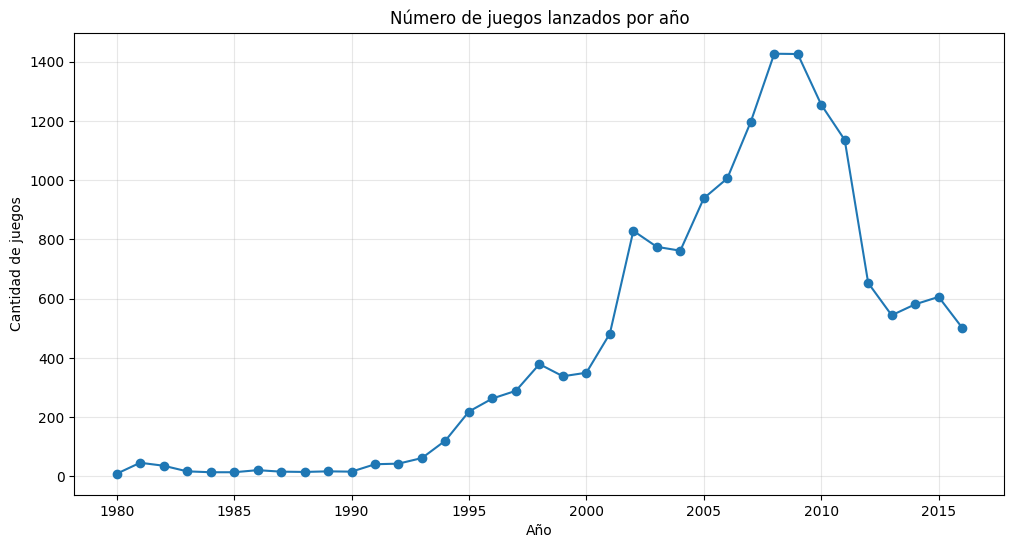

In [ ]:
# Filtrar por años 
years_valid = games_all['year_of_release'].value_counts().sort_index()
print(years_valid)

# Crear gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(years_valid.index, years_valid.values, marker='o')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.grid(True, alpha=0.3)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver claramente la tendencia de los videojuegos con un incremento constante en años anteriores que ha empezado a ir en declive en los últimos años
</div>


Con los datos obtenidos anteriormente, se observa que en el periodo del 2005 al 2011, se tiene una gran cantidad de videojuegos lanzados, meintras que antes del año 2000, la cantidad de videojuegos lanzados eran muy pocos

### 2.2 Ventas por plataformas

TOP 10 PLATAFORMAS POR VENTAS TOTALES
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


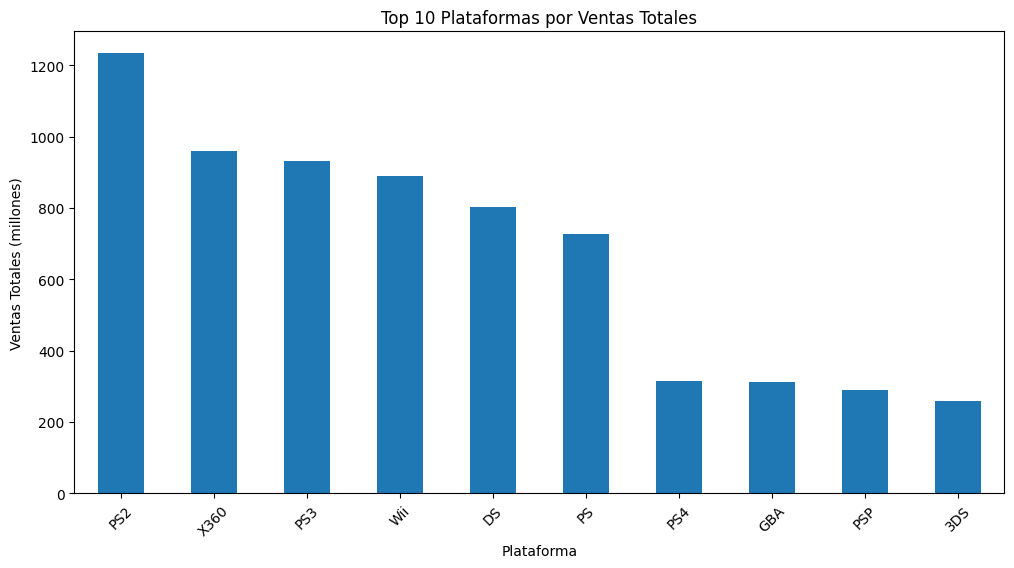

In [ ]:
# Ventas totales por plataforma
platform_sales = games_all.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("TOP 10 PLATAFORMAS POR VENTAS TOTALES")
print(platform_sales.head(10))

# Visualizar
plt.figure(figsize=(12, 6))
platform_sales.head(10).plot(kind='bar')
plt.title('Top 10 Plataformas por Ventas Totales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()

platform             DS    GBA      PS     PS2     PS3     PS4     Wii    X360
year_of_release                                                               
1985               0.02   0.00    0.00    0.00    0.00    0.00    0.00    0.00
1994               0.00   0.00    6.03    0.00    0.00    0.00    0.00    0.00
1995               0.00   0.00   35.96    0.00    0.00    0.00    0.00    0.00
1996               0.00   0.00   94.70    0.00    0.00    0.00    0.00    0.00
1997               0.00   0.00  136.17    0.00    0.00    0.00    0.00    0.00
1998               0.00   0.00  169.49    0.00    0.00    0.00    0.00    0.00
1999               0.00   0.00  144.53    0.00    0.00    0.00    0.00    0.00
2000               0.00   0.07   96.37   39.17    0.00    0.00    0.00    0.00
2001               0.00  61.53   35.59  166.43    0.00    0.00    0.00    0.00
2002               0.00  74.16    6.67  205.38    0.00    0.00    0.00    0.00
2003               0.00  56.67    2.07  184.31    0.

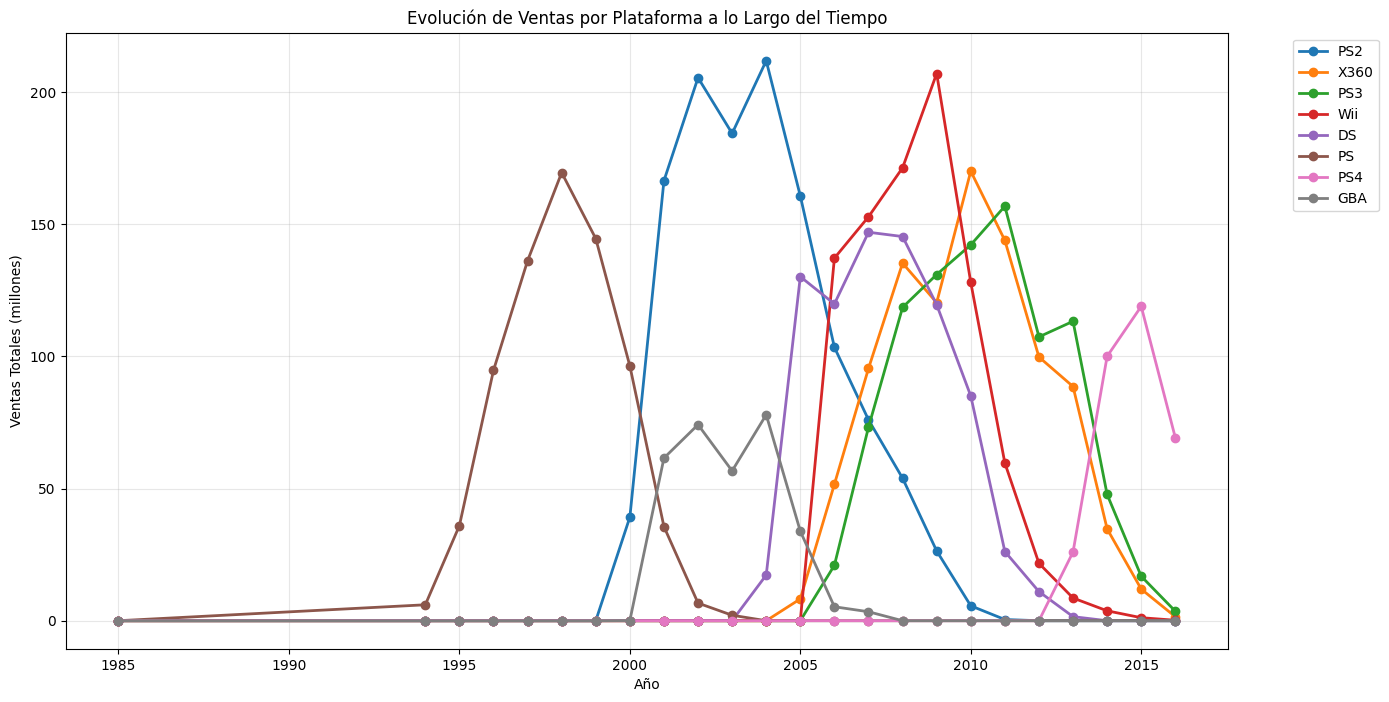

In [ ]:
# Seleccionar las top 8 plataformas para análisis detallado
top_platforms = platform_sales.head(8).index.tolist()

# Crear tabla de ventas por año y plataforma
platform_year_sales = games_all[games_all['platform'].isin(top_platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
print(platform_year_sales)

# Visualizar evolución temporal
plt.figure(figsize=(15, 8))
for platform in top_platforms:
    if platform in platform_year_sales.columns:
        plt.plot(platform_year_sales.index, platform_year_sales[platform], 
                marker='o', label=platform, linewidth=2)

plt.title('Evolución de Ventas por Plataforma a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Buena manera de mostrar los datos, gracias a la gráfica podemos darnos una idea del tiempo de vida de cada una de las plataformas
</div>


Con los datos que se obtuvieron, se observa que las plataformas que solían ser popularesppero que actualmente ya no tienen ventas son PS, PS2, GBA y  DS; también se observa que aprox. tarda un promedio de 3 años en desaparecer, tomando en cuenta el declibe de ventas que tiene.

Mientras que para las nuevas plataformas en aparecer, toma un aprox. de 5 años en aparecer en el mercado, por ejemplo, cuando estaba en tendencia la paltaforma PS, desde su incio hasta la aparición de GBA o PS2 hay una diferencia de 6 años.

### 2.3 Ánalisis de plataformas líderes

Para el ánalisis de datos se obtará por el periodo 2010-2016, ya que años anteriroes pueden ser irrelevantes para construir un modelo para el 2017.

In [ ]:
# Filtrar datos para el período elegido
period_data = games_all[(games_all['year_of_release'] >= 2010) & 
                       (games_all['year_of_release'] <= 2016)]

print("VALIDACIÓN DEL PERÍODO 2010-2016")
print(f"Total de juegos en el período: {len(period_data)}")
print(f"Porcentaje del dataset total: {len(period_data)/len(games_all)*100:.1f}%")

# Distribución por año
year_distribution = period_data['year_of_release'].value_counts().sort_index()
print("\nJUEGOS POR AÑO EN EL PERÍODO ")
print(year_distribution)

# Plataformas activas en este período
active_platforms = period_data['platform'].value_counts()
print(f"\nPLATAFORMAS ACTIVAS (Top 10)")
print(active_platforms.head(10))

VALIDACIÓN DEL PERÍODO 2010-2016
Total de juegos en el período: 5277
Porcentaje del dataset total: 32.1%

JUEGOS POR AÑO EN EL PERÍODO 
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

PLATAFORMAS ACTIVAS (Top 10)
PS3     889
X360    680
3DS     512
DS      507
PSP     500
PC      479
Wii     450
PSV     429
PS4     392
XOne    247
Name: platform, dtype: int64


LÍDERES EN VENTAS 2010-2016
platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
Name: total_sales, dtype: float64


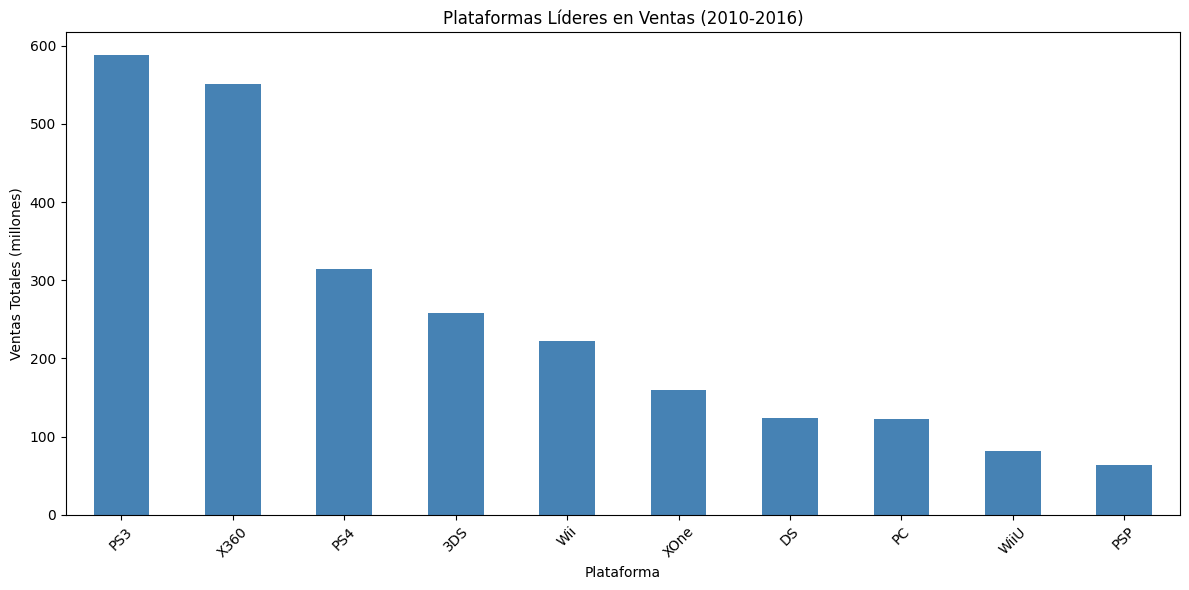

In [ ]:
# 1. LÍDERES EN VENTAS (período 2010-2016)
period_platform_sales = period_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("LÍDERES EN VENTAS 2010-2016")
print(period_platform_sales.head(10))

# Visualizar líderes
plt.figure(figsize=(12, 6))
period_platform_sales.head(10).plot(kind='bar', color='steelblue')
plt.title('Plataformas Líderes en Ventas (2010-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2. ANÁLISIS DE TENDENCIAS (crecimiento vs declive)
# Comparar ventas del inicio (2010-2012) vs final (2014-2016) del período

early_period = period_data[period_data['year_of_release'].isin([2010, 2011, 2012])]
late_period = period_data[period_data['year_of_release'].isin([2014, 2015, 2016])]

early_sales = early_period.groupby('platform')['total_sales'].sum()
late_sales = late_period.groupby('platform')['total_sales'].sum()

# Crear DataFrame de comparación
trend_analysis = pd.DataFrame({
    'early_sales': early_sales,
    'late_sales': late_sales
}).fillna(0)

# Calcular cambio porcentual
trend_analysis['growth_rate'] = ((trend_analysis['late_sales'] - trend_analysis['early_sales']) / 
                                (trend_analysis['early_sales'] + 0.1)) * 100


# Filtrar solo plataformas con ventas significativas
significant_platforms = trend_analysis[
    (trend_analysis['early_sales'] > 10) | (trend_analysis['late_sales'] > 10)
].sort_values('growth_rate', ascending=False)

print("ANÁLISIS DE CRECIMIENTO/DECLIVE")
print(significant_platforms)

ANÁLISIS DE CRECIMIENTO/DECLIVE
          early_sales  late_sales    growth_rate
platform                                        
PS4              0.00      288.15  288150.000000
XOne             0.00      140.36  140360.000000
WiiU            17.56       42.98     143.941110
PSV             20.82       22.40       7.552581
3DS            114.56       86.68     -24.315367
PC              82.53       27.05     -67.142684
PS3            406.31       68.18     -83.199232
X360           413.61       48.22     -88.320321
Wii            209.31        5.07     -97.531159
PSP             60.55        0.36     -99.241550
DS             122.21        0.00     -99.918241


In [ ]:
# 3. CLASIFICAR PLATAFORMAS POR COMPORTAMIENTO
print("\nCLASIFICACIÓN DE PLATAFORMAS")

# Plataformas en CRECIMIENTO (growth_rate > 100%)
growing = significant_platforms[significant_platforms['growth_rate'] > 100]
print("PLATAFORMAS EN CRECIMIENTO:")
for platform in growing.index:
    print(f"  - {platform}: {growing.loc[platform, 'growth_rate']:.1f}% crecimiento")

# Plataformas ESTABLES (growth_rate entre -50% y 100%)
stable = significant_platforms[(significant_platforms['growth_rate'] >= -50) & 
                              (significant_platforms['growth_rate'] <= 100)]
print("\nPLATAFORMAS ESTABLES:")
for platform in stable.index:
    print(f"  - {platform}: {stable.loc[platform, 'growth_rate']:.1f}% cambio")

# Plataformas en DECLIVE (growth_rate < -50%)
declining = significant_platforms[significant_platforms['growth_rate'] < -50]
print("\nPLATAFORMAS EN DECLIVE:")
for platform in declining.index:
    print(f"  - {platform}: {declining.loc[platform, 'growth_rate']:.1f}% declive")


CLASIFICACIÓN DE PLATAFORMAS
PLATAFORMAS EN CRECIMIENTO:
  - PS4: 288150.0% crecimiento
  - XOne: 140360.0% crecimiento
  - WiiU: 143.9% crecimiento

PLATAFORMAS ESTABLES:
  - PSV: 7.6% cambio
  - 3DS: -24.3% cambio

PLATAFORMAS EN DECLIVE:
  - PC: -67.1% declive
  - PS3: -83.2% declive
  - X360: -88.3% declive
  - Wii: -97.5% declive
  - PSP: -99.2% declive
  - DS: -99.9% declive


Con los datos anteriores, se observa que las plataformas con más ventas en el periodo seleccionado para el ánalisis son PS3, X360 y PS4, Sin embargo, las plataformas que estan en crecimiento son PS4,XOne y WiiU, mientras que las que estan en declive son PC, PS3, X360, Wii, PSP y DS.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Excelente analisis de ventas, podemos ver que cuando una plataforma moderna sale al mercado las antiguas comienzan a decaer
</div>


### 2.4 Diagrama de caja ventas globales

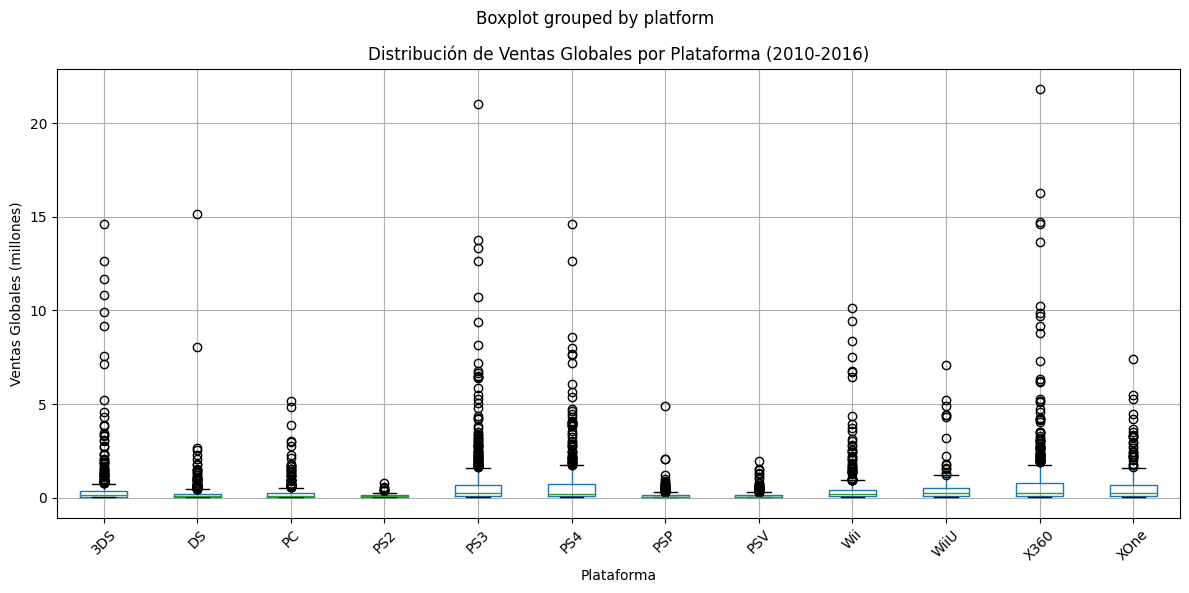

In [ ]:
# 1. CREAR EL DIAGRAMA DE CAJA
plt.figure(figsize=(12, 6))
period_data.boxplot(column='total_sales', by='platform', ax=plt.gca())
plt.title('Distribución de Ventas Globales por Plataforma (2010-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


Recomiendo utilizar el parametro `showfliers = False`, este remueve los outliers de la gráfica por lo que las cajas se muestran de una mejor manera, te dejo el ejemplo en la celda de abajo
</div>


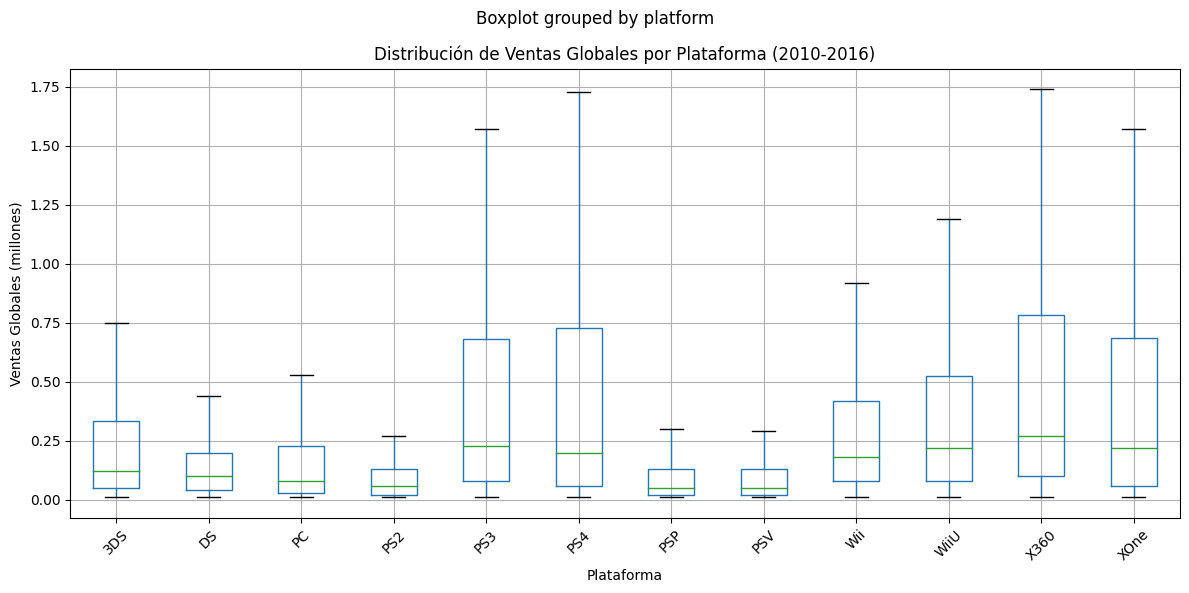

In [ ]:
# 1. CREAR EL DIAGRAMA DE CAJA
plt.figure(figsize=(12, 6))
period_data.boxplot(column='total_sales', by='platform', ax=plt.gca(), showfliers = False)
plt.title('Distribución de Ventas Globales por Plataforma (2010-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2. ESTADÍSTICAS DESCRIPTIVAS POR PLATAFORMA
platform_stats = period_data.groupby('platform')['total_sales'].agg([
    'count',    # Número de juegos
    'mean',     # Promedio
    'median',   # Mediana
    'std',      # Desviación estándar
    'min',      # Mínimo
    'max'       # Máximo
]).round(2)

print("=== ESTADÍSTICAS DE VENTAS POR PLATAFORMA ===")
print(platform_stats.sort_values('mean', ascending=False))

=== ESTADÍSTICAS DE VENTAS POR PLATAFORMA ===
          count  mean  median   std   min    max
platform                                        
X360        680  0.81    0.27  1.82  0.01  21.82
PS4         392  0.80    0.20  1.61  0.01  14.63
PS3         889  0.66    0.23  1.46  0.01  21.05
XOne        247  0.65    0.22  1.04  0.01   7.39
WiiU        147  0.56    0.22  1.06  0.01   7.09
3DS         512  0.50    0.12  1.44  0.01  14.60
Wii         450  0.50    0.18  1.12  0.01  10.12
PC          479  0.25    0.08  0.53  0.01   5.14
DS          507  0.24    0.10  0.82  0.01  15.13
PS2          45  0.14    0.06  0.18  0.01   0.76
PSP         500  0.13    0.05  0.29  0.01   4.87
PSV         429  0.13    0.05  0.21  0.01   1.96


Con lo anterior, se observa que las plataformas con más ventas son muy similares entre sí, pues todas tienen varios valores atípicos, como medias algo similiares (no hay una que descate exageradamente en comparación con las otras). Sin embargo, se observa que si hay unas con variablidad, por ejemplo, PS3, PS4, X360, XOne tienen más variabilidad en las ventas que los demás (espacios intercuartiles más amplios).
También se observa que la mayoria de las plataformas tienen outliers (valores atípicos), lo cual nos dice que sus ventas son excepcionales, destacando PS3, X360 y DS con los outliers más altos.
Revisando los valores estadísticos obtenidos, se observa que el top 3 de plataformas con mayor venta son X360, PS3 y PS4 para el periodo 2010-2016 que fue analizado.

### 2.5 Afectación en ventas por reseñas entre usuarios y profesionales

In [ ]:
# Primero, identifica las plataformas con más juegos en el período 2010-2016
platform_counts = period_data['platform'].value_counts()
print("PLATAFORMAS MÁS POPULARES (2010-2016)")
print(platform_counts.head(10))

# Eleccion una plataforma popular 
selected_platform = 'PS3'  # O puedes usar 'X360', 'PS4'
platform_data = period_data[period_data['platform'] == selected_platform].copy()

print(f"\nAnalizando {selected_platform}: {len(platform_data)} juegos")

PLATAFORMAS MÁS POPULARES (2010-2016)
PS3     889
X360    680
3DS     512
DS      507
PSP     500
PC      479
Wii     450
PSV     429
PS4     392
XOne    247
Name: platform, dtype: int64

Analizando PS3: 889 juegos


In [ ]:
# LIMPIAR DATOS (eliminar valores faltantes)
clean_data = platform_data.dropna(subset=['user_score', 'critic_score', 'total_sales'])

# Verificar cuántos datos tenemos después de la limpieza
print(f"Datos limpios: {len(clean_data)} juegos con reseñas completas")
print(f"Porcentaje de datos utilizables: {len(clean_data)/len(platform_data)*100:.1f}%")

# Mostrar estadísticas básicas
print("\n=== ESTADÍSTICAS DE LOS DATOS LIMPIOS ===")
print(clean_data[['critic_score', 'user_score', 'total_sales']].describe())

Datos limpios: 457 juegos con reseñas completas
Porcentaje de datos utilizables: 51.4%

=== ESTADÍSTICAS DE LOS DATOS LIMPIOS ===
       critic_score  user_score  total_sales
count    457.000000  457.000000   457.000000
mean      70.772429    6.723195     1.025799
std       13.826806    1.451356     1.878527
min       13.000000    0.500000     0.010000
25%       62.000000    6.000000     0.210000
50%       73.000000    7.100000     0.510000
75%       81.000000    7.800000     1.040000
max       97.000000    9.100000    21.050000


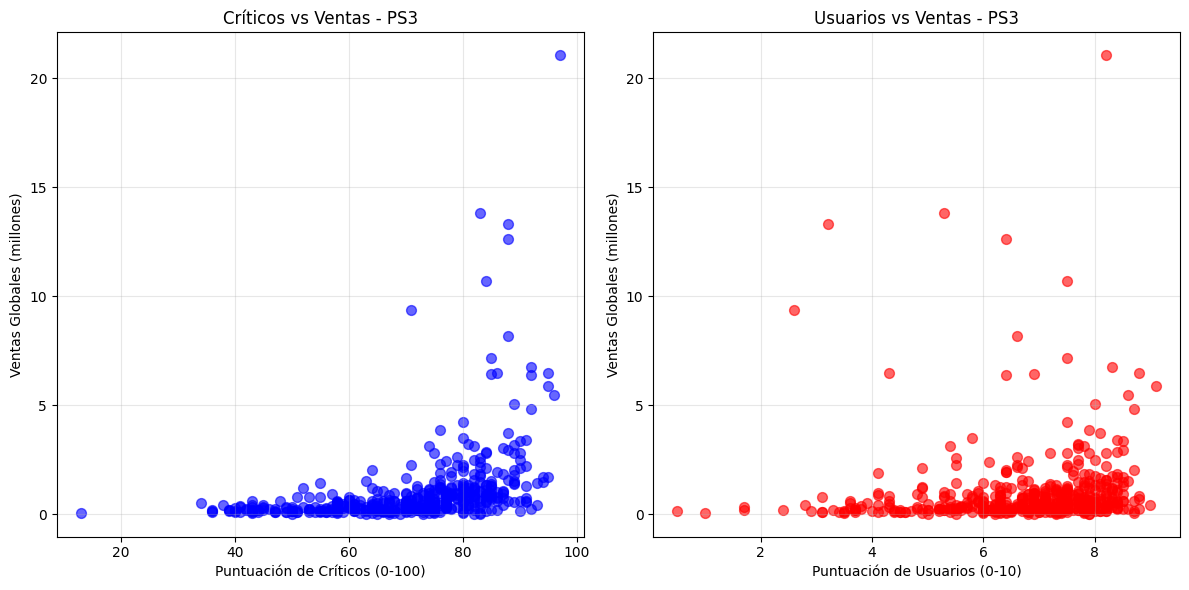

In [ ]:
# GRÁFICOS DE DISPERSIÓN
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Críticos vs Ventas
ax1.scatter(clean_data['critic_score'], clean_data['total_sales'], 
           alpha=0.6, color='blue', s=50)
ax1.set_xlabel('Puntuación de Críticos (0-100)')
ax1.set_ylabel('Ventas Globales (millones)')
ax1.set_title(f'Críticos vs Ventas - {selected_platform}')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Usuarios vs Ventas
ax2.scatter(clean_data['user_score'], clean_data['total_sales'], 
           alpha=0.6, color='red', s=50)
ax2.set_xlabel('Puntuación de Usuarios (0-10)')
ax2.set_ylabel('Ventas Globales (millones)')
ax2.set_title(f'Usuarios vs Ventas - {selected_platform}')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

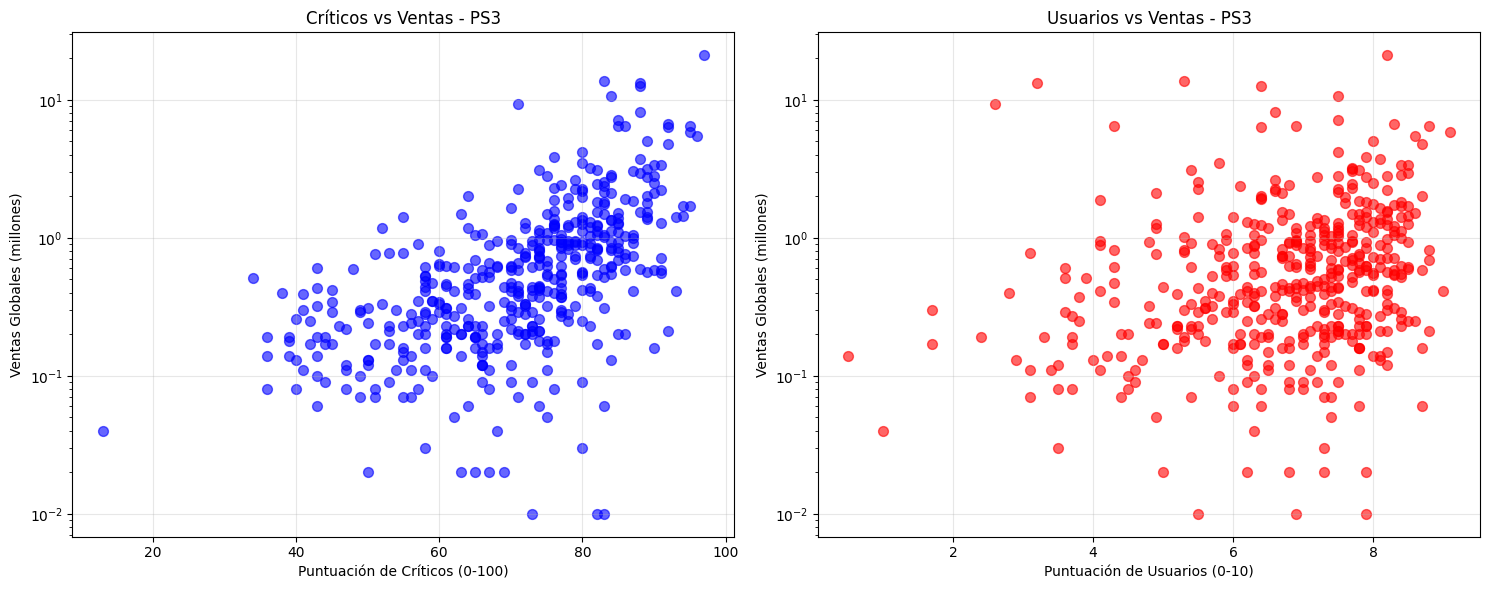

In [ ]:
# MEJORAR LA VISUALIZACIÓN
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Críticos vs Ventas (con escala logarítmica)
ax1.scatter(clean_data['critic_score'], clean_data['total_sales'], 
           alpha=0.6, color='blue', s=50)
ax1.set_xlabel('Puntuación de Críticos (0-100)')
ax1.set_ylabel('Ventas Globales (millones)')
ax1.set_title(f'Críticos vs Ventas - {selected_platform}')
ax1.set_yscale('log')  # Escala logarítmica para ver mejor
ax1.grid(True, alpha=0.3)

# Gráfico 2: Usuarios vs Ventas (con escala logarítmica)
ax2.scatter(clean_data['user_score'], clean_data['total_sales'], 
           alpha=0.6, color='red', s=50)
ax2.set_xlabel('Puntuación de Usuarios (0-10)')
ax2.set_ylabel('Ventas Globales (millones)')
ax2.set_title(f'Usuarios vs Ventas - {selected_platform}')
ax2.set_yscale('log')  # Escala logarítmica para ver mejor
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ESTADÍSTICAS INTERESANTES
print("=== DISTRIBUCIÓN DE VENTAS ===")
print(f"Juegos que vendieron menos de 0.1 millones: {(clean_data['total_sales'] < 0.1).sum()}")
print(f"Juegos que vendieron más de 1 millón: {(clean_data['total_sales'] > 1.0).sum()}")
print(f"Juegos que vendieron más de 5 millones: {(clean_data['total_sales'] > 5.0).sum()}")

print(f"\nVentas máximas: {clean_data['total_sales'].max():.2f} millones")
print(f"Ventas promedio: {clean_data['total_sales'].mean():.2f} millones")

=== DISTRIBUCIÓN DE VENTAS ===
Juegos que vendieron menos de 0.1 millones: 36
Juegos que vendieron más de 1 millón: 118
Juegos que vendieron más de 5 millones: 16

Ventas máximas: 21.05 millones
Ventas promedio: 1.03 millones


In [ ]:
#CALCULAR CORRELACIONES
critic_corr = clean_data['critic_score'].corr(clean_data['total_sales'])
user_corr = clean_data['user_score'].corr(clean_data['total_sales'])

print("RESULTADOS DE CORRELACIÓN")
print(f"Correlación Críticos vs Ventas: {critic_corr:.3f}")
print(f"Correlación Usuarios vs Ventas: {user_corr:.3f}")

# Interpretación automática
def interpretar_correlacion(corr):
    if abs(corr) >= 0.7:
        return "FUERTE"
    elif abs(corr) >= 0.3:
        return "MODERADA"
    elif abs(corr) >= 0.1:
        return "DÉBIL"
    else:
        return "CASI NULA"

print(f"\nINTERPRETACIÓN")
print(f"Relación Críticos-Ventas: {interpretar_correlacion(critic_corr)}")
print(f"Relación Usuarios-Ventas: {interpretar_correlacion(user_corr)}")

RESULTADOS DE CORRELACIÓN
Correlación Críticos vs Ventas: 0.394
Correlación Usuarios vs Ventas: 0.083

INTERPRETACIÓN
Relación Críticos-Ventas: MODERADA
Relación Usuarios-Ventas: CASI NULA


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de mostrar la correlación entre las ventas y las reseñas, como bien mencionas la correlación es debil-moderada por lo que no siempre las buenas reseñas van a implicar un gran numero de ventas
</div>


En este apartado, se trabajó con el periodo del 2010-2016, ya que a mi consideración, esta muestra de datos es relevante para construir un modelo para el año 2017, pues los juegos lanzados anteriormente pueden ser irrelevantes para nuestro modelo.
Para este ánalisis se utilizó la paltaforma de PS3, ya que es de las que plataformas que más datos sobre ventas y puntuaciones tiene.
Con los datos estadísticos obtenidos, y con los gráficos de dispersión, se observa que para la reseñas de los profesionales si hay un correlación positiva, pues los datos tienden tener una pendiente positva, lo cual suguiere que un juego calificado  con una buena puntuación tiene más ventas, mientras haciendo la comparación con las críticas de los usuarios, se puede observar una correlación muy nula, pues los puntos no tienen una pendiente positiva muy clara. Con el estadístico obtenido de la correlación estre las variables ventas con critic score y de ventas con user score, se confirma que para critic scroe si hay una correlación moderada entre la calificación y el éxito de ventas de los juegos.

### 2.6 Ventas del mismo juego en diferentes plataformas

In [ ]:
# ENCONTRAR JUEGOS QUE ESTÁN EN MÚLTIPLES PLATAFORMAS

# Contar en cuántas plataformas aparece cada juego
games_per_platform = period_data.groupby('name')['platform'].nunique().sort_values(ascending=False)

print("Top 10 juegos en más plataformas:")
print(games_per_platform.head(10))

# Filtrar juegos que están en al menos 3 plataformas
multi_platform_games = games_per_platform[games_per_platform >= 3].index.tolist()
print(f"\nTotal de juegos en 3+ plataformas: {len(multi_platform_games)}")

Top 10 juegos en más plataformas:
name
LEGO Marvel Super Heroes        9
FIFA 14                         9
LEGO Jurassic World             8
Lego Batman 3: Beyond Gotham    8
The LEGO Movie Videogame        8
LEGO The Hobbit                 8
FIFA 15                         8
Terraria                        8
FIFA Soccer 13                  8
Angry Birds Star Wars           8
Name: platform, dtype: int64

Total de juegos en 3+ plataformas: 518


In [ ]:
# FUNCIÓN PARA COMPARAR UN JUEGO EN DIFERENTES PLATAFORMAS
def analizar_juego_multiplataforma(game_name):
    game_data = period_data[period_data['name'] == game_name].copy()
    
    if len(game_data) <= 1:
        print(f" {game_name} solo está en una plataforma")
        return None
    
    print(f"\n ANÁLISIS DETALLADO: {game_name}")
    
    # Mostrar datos ordenados por ventas
    comparison = game_data[['platform', 'total_sales', 'critic_score', 'user_score']].sort_values('total_sales', ascending=False)
    print(comparison)
    
    # Estadísticas interesantes
    print(f"\nPlataforma con más ventas: {comparison.iloc[0]['platform']} ({comparison.iloc[0]['total_sales']:.2f}M)")
    print(f"Plataforma con menos ventas: {comparison.iloc[-1]['platform']} ({comparison.iloc[-1]['total_sales']:.2f}M)")
    
    # Diferencia entre plataformas
    max_sales = comparison['total_sales'].max()
    min_sales = comparison['total_sales'].min()
    print(f"Diferencia máx-mín: {max_sales - min_sales:.2f} millones")
    print(f"La mejor plataforma vende {max_sales/min_sales:.1f}x más que la peor")
    
    return comparison

# Analizar el primer juego multiplataforma
#Elegir primer juego
primer_juego = multi_platform_games[0]
resultado = analizar_juego_multiplataforma(primer_juego)


 ANÁLISIS DETALLADO: LEGO Marvel Super Heroes
     platform  total_sales  critic_score  user_score
730      X360         2.22          80.0         7.6
945       PS3         1.83          82.0         7.9
1139      PS4         1.62          83.0         7.7
1959     XOne         1.05           NaN         6.8
2313      3DS         0.89          61.0         5.2
2778     WiiU         0.74          82.0         8.0
3876      PSV         0.51           NaN         NaN
5054       DS         0.38           NaN         4.8
8369       PC         0.17          78.0         8.1

Plataforma con más ventas: X360 (2.22M)
Plataforma con menos ventas: PC (0.17M)
Diferencia máx-mín: 2.05 millones
La mejor plataforma vende 13.1x más que la peor


Con los datos que se obtuvieron en este ánalisis de un solo juego en diferentes plataformas, se observa que las plataformas con más ventas, son las que estan en tendencia durante el periodo seleccionado (X360 y PS3), y después le sigue las plataformas que esta surgiendo en este periodo (PS4, XOne, WiiU), también es posible observar que estas plataformas mencionadas, tienen una buena calificación por parte de los profesionales, lo cual se puede decir que tiene una correlacioón moderada.

### 2.7 Distribución general de los juegos por género

CANTIDAD DE JUEGOS POR GÉNERO
Action          1495
Misc             576
Sports           575
Role-Playing     568
Adventure        563
Shooter          410
Racing           237
Simulation       217
Fighting         199
Strategy         170
Platform         153
Puzzle           114
Name: genre, dtype: int64


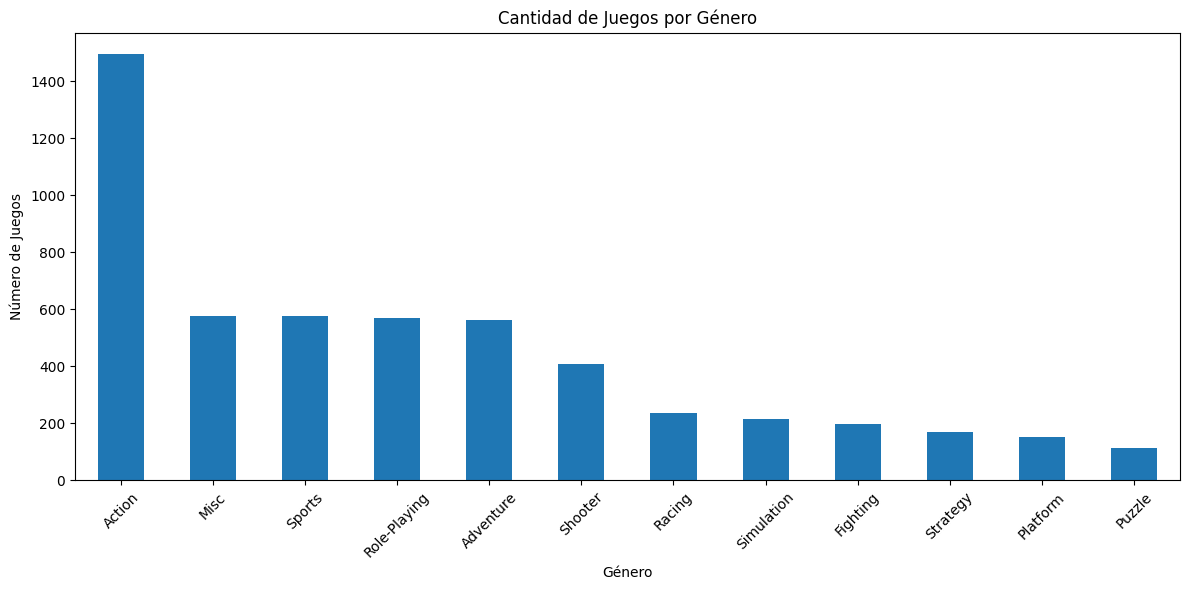

In [ ]:
#  DISTRIBUCIÓN DE CANTIDAD DE JUEGOS POR GÉNERO
print("CANTIDAD DE JUEGOS POR GÉNERO")
games_by_genre = period_data['genre'].value_counts()
print(games_by_genre)

# Visualizar
plt.figure(figsize=(12, 6))
games_by_genre.plot(kind='bar')
plt.title('Cantidad de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


VENTAS TOTALES POR GÉNERO
genre
Action          673.09
Shooter         479.74
Sports          328.39
Role-Playing    315.28
Misc            234.56
Racing          122.68
Platform        119.72
Fighting         81.59
Simulation       71.75
Adventure        61.00
Strategy         35.84
Puzzle           20.60
Name: total_sales, dtype: float64


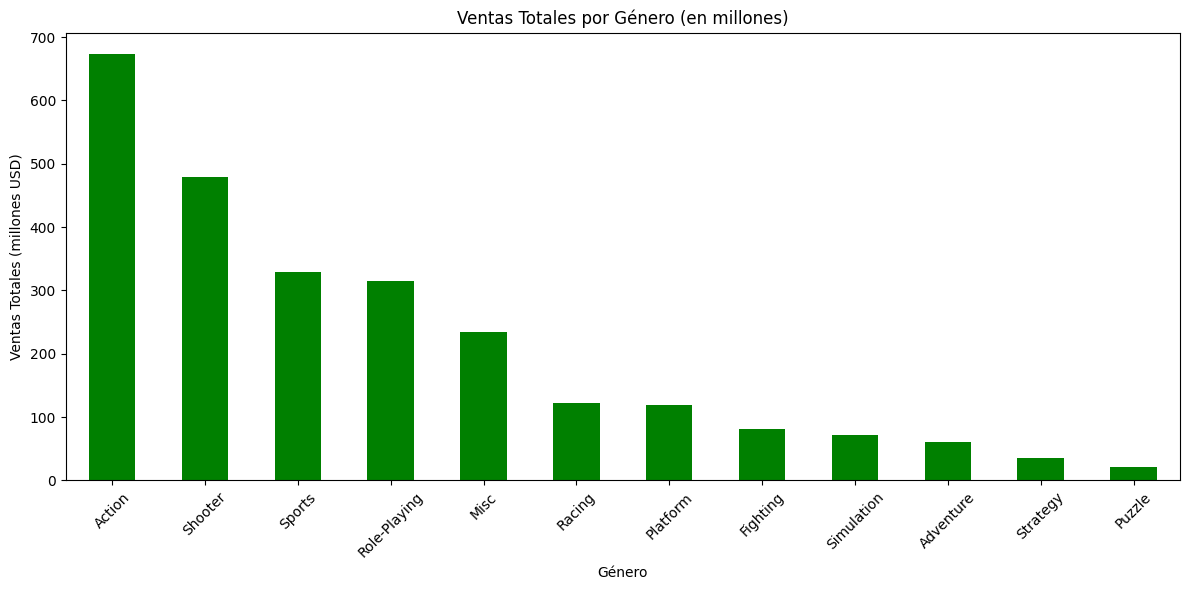

In [ ]:
# VENTAS TOTALES POR GÉNERO (RENTABILIDAD)
print("\nVENTAS TOTALES POR GÉNERO")
sales_by_genre = period_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(sales_by_genre)

# Visualizar
plt.figure(figsize=(12, 6))
sales_by_genre.plot(kind='bar', color='green')
plt.title('Ventas Totales por Género (en millones)')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 3. VENTAS PROMEDIO POR JUEGO EN CADA GÉNERO
print("\nVENTAS PROMEDIO POR JUEGO")
avg_sales_by_genre = period_data.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print(avg_sales_by_genre)

# Crear tabla comparativa
comparison_table = pd.DataFrame({
    'Cantidad_Juegos': games_by_genre,
    'Ventas_Totales': sales_by_genre,
    'Ventas_Promedio': avg_sales_by_genre
}).fillna(0)

print("\nTABLA COMPARATIVA")
print(comparison_table.round(2))


VENTAS PROMEDIO POR JUEGO
genre
Shooter         1.170098
Platform        0.782484
Sports          0.571113
Role-Playing    0.555070
Racing          0.517637
Action          0.450227
Fighting        0.410000
Misc            0.407222
Simulation      0.330645
Strategy        0.210824
Puzzle          0.180702
Adventure       0.108348
Name: total_sales, dtype: float64

TABLA COMPARATIVA
              Cantidad_Juegos  Ventas_Totales  Ventas_Promedio
Action                   1495          673.09             0.45
Adventure                 563           61.00             0.11
Fighting                  199           81.59             0.41
Misc                      576          234.56             0.41
Platform                  153          119.72             0.78
Puzzle                    114           20.60             0.18
Racing                    237          122.68             0.52
Role-Playing              568          315.28             0.56
Shooter                   410          479.74  

Con los datos obtenidos, se obvserva que los géneros con mayor cantidad de juegos en el mercado son action, misc y sports, haciendo una comparativa, de estos géneros con los géneros con mayor ventas, se tiene que dos de estos estan en el el top de ventas, pues los géneros con mayor ventas son action, shooter y sports.

Obteniendo un promedio de ventas por cada uno de los géneros que se tiene en el dataframe, se observa que los 3 géneros con promedio de ventas más altos son shooter, platform y sports

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos, podemos ver claramente cuales son los géneros preferidos de las personas, las observaciones que haces me parecen buenas también
</div>


## 3 Perfil de Usuario para cada región

In [ ]:
#  PLATAFORMAS PRINCIPALES POR REGIÓN
print("TOP 5 PLATAFORMAS POR REGIÓN")

# Calcular ventas por plataforma en cada región
na_platforms = period_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms = period_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms = period_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("NORTEAMÉRICA:")
print(na_platforms)
print("\nEUROPA:")
print(eu_platforms)
print("\nJAPÓN:")
print(jp_platforms)

# Crear tabla comparativa
platforms_comparison = pd.DataFrame({
    'NA_Top5': na_platforms.index,
    'NA_Sales': na_platforms.values,
    'EU_Top5': eu_platforms.index,
    'EU_Sales': eu_platforms.values,
    'JP_Top5': jp_platforms.index,
    'JP_Sales': jp_platforms.values
})

print("\nTABLA COMPARATIVA")
print(platforms_comparison)

TOP 5 PLATAFORMAS POR REGIÓN
NORTEAMÉRICA:
platform
X360    334.18
PS3     229.25
Wii     121.20
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64

EUROPA:
platform
PS3     213.60
X360    163.41
PS4     141.09
PC       68.82
Wii      65.91
Name: eu_sales, dtype: float64

JAPÓN:
platform
3DS    100.62
PS3     59.26
PSP     42.20
DS      27.90
PSV     21.84
Name: jp_sales, dtype: float64

TABLA COMPARATIVA
  NA_Top5  NA_Sales EU_Top5  EU_Sales JP_Top5  JP_Sales
0    X360    334.18     PS3    213.60     3DS    100.62
1     PS3    229.25    X360    163.41     PS3     59.26
2     Wii    121.20     PS4    141.09     PSP     42.20
3     PS4    108.74      PC     68.82      DS     27.90
4    XOne     93.12     Wii     65.91     PSV     21.84


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Los resultados son correctos, recomiendo acompañarlos con una gráfica que resalte las diferencias entre las regiones
</div>


Con la comparartiva realizada anteriormente, se observa que para la region de Norteamerica, los usuarios tienden a comprar videojuegos para consolas X360, PS3 y Wii, como las primeras top 3; para la rgión de Europa, el top 3 de plataformas más usadas en los juegos son PS3, X360 y PS4; mientras que para Japón hay un pequeño cambio, pues el top 3 de plataformas para esta región son 3DS, PS3 y PSP, siendo así, un poco más diferentes de las otras dos regiones, pues en el top de Japon se tienen consolas portátiles como las más usadas.


TOP 5 GÉNEROS POR REGIÓN
 NORTEAMÉRICA:
genre
Action          290.64
Shooter         237.47
Sports          156.81
Misc            123.80
Role-Playing    112.05
Name: na_sales, dtype: float64

 EUROPA:
genre
Action          233.63
Shooter         171.45
Sports          116.84
Role-Playing     75.48
Misc             66.09
Name: eu_sales, dtype: float64

 JAPÓN:
genre
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67
Name: jp_sales, dtype: float64


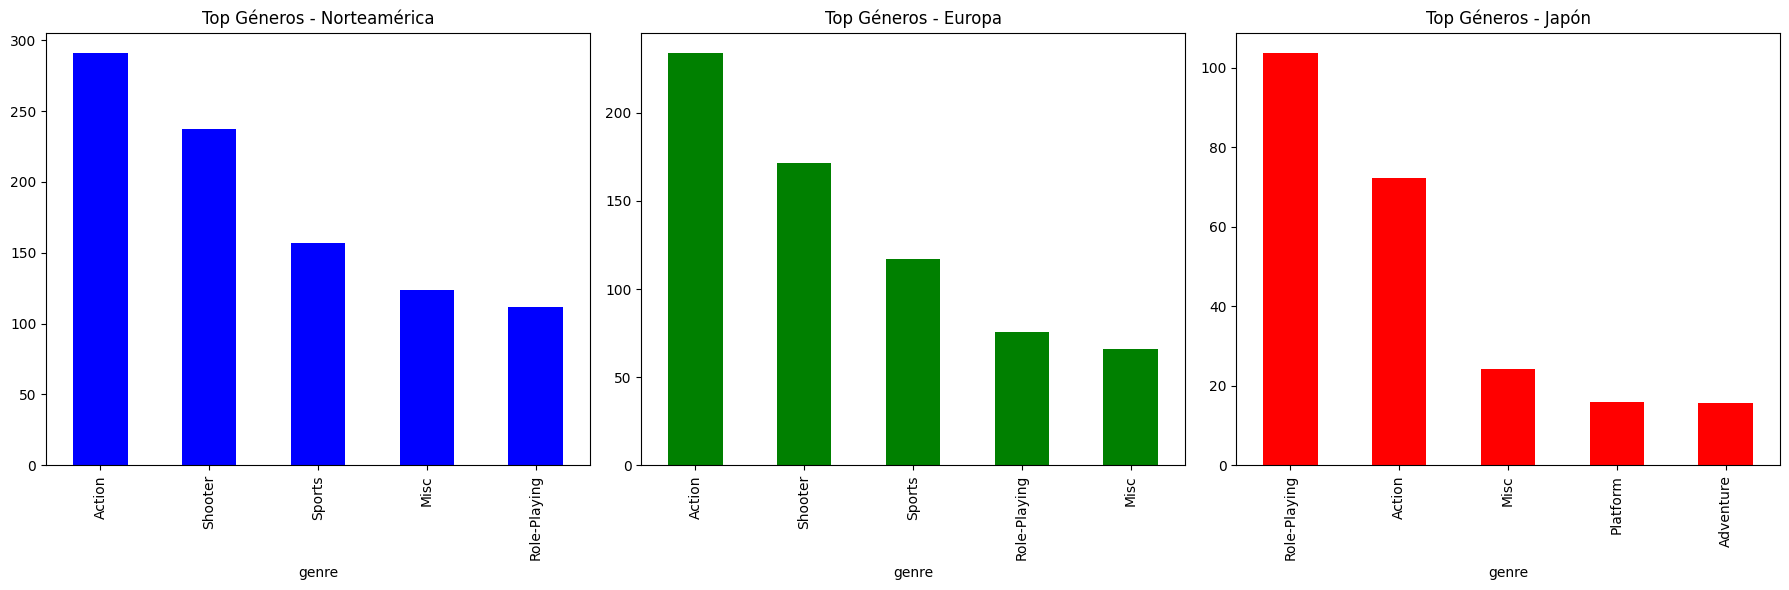

In [ ]:
#  GÉNEROS PRINCIPALES POR REGIÓN
print("\nTOP 5 GÉNEROS POR REGIÓN")

na_genres = period_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genres = period_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genres = period_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print(" NORTEAMÉRICA:")
print(na_genres)
print("\n EUROPA:")
print(eu_genres)
print("\n JAPÓN:")
print(jp_genres)

# Visualizar diferencias
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

na_genres.plot(kind='bar', ax=axes[0], title='Top Géneros - Norteamérica', color='blue')
eu_genres.plot(kind='bar', ax=axes[1], title='Top Géneros - Europa', color='green')
jp_genres.plot(kind='bar', ax=axes[2], title='Top Géneros - Japón', color='red')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de mostrar los resultados, las graficas me parecen correctas
</div>


Con las listas y gráficos obtenidos anteriormente, se obvservan los géneros más vendidos para cada una de las regiones registradas en nuestros archivos. En esta lista se puede obvservar que los géneros más vendidos en Norteamerica son Action, Shooter, Sports, Misc, Role-playing; mientras que para la región de Europa se tiene como top 5 los géneros de Action, Shooter, Sports, Role-Playing y Misc, siendo estos los mismos géneros más vendidos en NA solo que en difernte orden de frecuencia. En comparativa, Japón tiene una diferiencia en las géneros más vendidos, pues el top 5 de esta región es Role-playing, Action, Misc, Platform, Adventure.

Estas diferiencias entre las regiones de NA, EU con JA, se puede deber a los cambios culturales que se tienen en la region de Japón, por lo que se opta por juegos más conservadores


=== IMPACTO DE CLASIFICACIONES ESRB ===
 NORTEAMÉRICA - Ventas por Rating:
rating
M         382.22
E         271.15
T         160.81
E10+      159.38
unkown    155.72
EC          1.13
RP          0.00
Name: na_sales, dtype: float64

 EUROPA - Ventas por Rating:
rating
M         292.04
E         197.34
unkown    139.44
T         113.08
E10+       99.28
RP          0.03
EC          0.00
Name: eu_sales, dtype: float64

 JAPÓN - Ventas por Rating:
rating
unkown    171.49
E          47.87
T          42.11
M          30.45
E10+       13.22
EC          0.00
RP          0.00
Name: jp_sales, dtype: float64

=== PORCENTAJES POR REGIÓN ===
        NA_Ventas  NA_Porcentaje  EU_Ventas  EU_Porcentaje  JP_Ventas  \
rating                                                                  
E          271.15           24.0     197.34           23.5      47.87   
E10+       159.38           14.1      99.28           11.8      13.22   
EC           1.13            0.1       0.00            0.0       0.00 

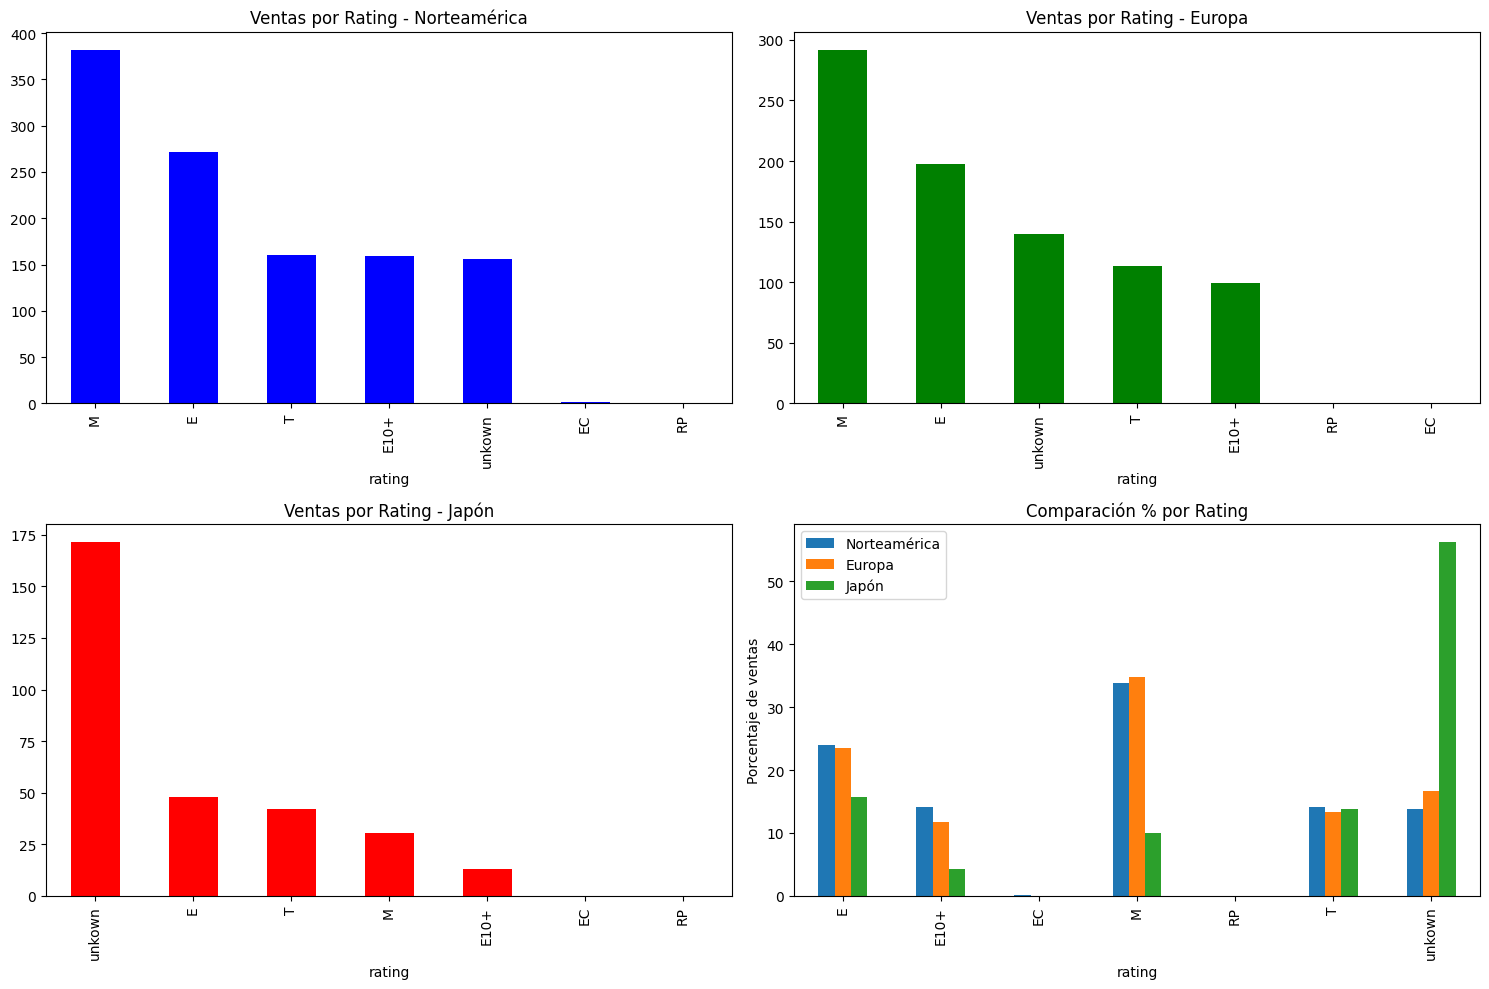

In [ ]:
# CLASIFICACIONES ESRB POR REGIÓN
print("\n=== IMPACTO DE CLASIFICACIONES ESRB ===")

# Ventas por rating en cada región
na_ratings = period_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_ratings = period_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_ratings = period_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print(" NORTEAMÉRICA - Ventas por Rating:")
print(na_ratings)
print("\n EUROPA - Ventas por Rating:")
print(eu_ratings)
print("\n JAPÓN - Ventas por Rating:")
print(jp_ratings)

# Calcular porcentajes para mejor comparación
print("\n=== PORCENTAJES POR REGIÓN ===")
na_ratings_pct = (na_ratings / na_ratings.sum() * 100).round(1)
eu_ratings_pct = (eu_ratings / eu_ratings.sum() * 100).round(1)
jp_ratings_pct = (jp_ratings / jp_ratings.sum() * 100).round(1)

ratings_comparison = pd.DataFrame({
    'NA_Ventas': na_ratings,
    'NA_Porcentaje': na_ratings_pct,
    'EU_Ventas': eu_ratings,
    'EU_Porcentaje': eu_ratings_pct,
    'JP_Ventas': jp_ratings,
    'JP_Porcentaje': jp_ratings_pct
}).fillna(0)

print(ratings_comparison)

# Visualizar comparación
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico de barras por región
na_ratings.plot(kind='bar', ax=axes[0,0], title='Ventas por Rating - Norteamérica', color='blue')
eu_ratings.plot(kind='bar', ax=axes[0,1], title='Ventas por Rating - Europa', color='green')
jp_ratings.plot(kind='bar', ax=axes[1,0], title='Ventas por Rating - Japón', color='red')

# Gráfico comparativo de porcentajes
ratings_pct_df = pd.DataFrame({
    'Norteamérica': na_ratings_pct,
    'Europa': eu_ratings_pct,
    'Japón': jp_ratings_pct
}).fillna(0)

ratings_pct_df.plot(kind='bar', ax=axes[1,1], title='Comparación % por Rating')
axes[1,1].set_ylabel('Porcentaje de ventas')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Podemos ver las preferencias/diferencias de las regiones ya que se ha utilizado una manera clara de mostrar la información
</div>


Con los datos  obtenidos, se observa queu para la región de NA se tiene como dominante los juegos con claisifcación 'M', siguiendole en el top con las clasificaciones 'E' y 'T', como el top 3 de las rating con mayor ventas en la región; para la region de EU se tiene, al igual que NA, la claficiación 'M' como la dominante en la región, siguiendole con la clasificación 'E' y en tercer lugar, como desconocida, ya que una gran parte de nuestros datos del archivo no tenian una clasificación establecida. Para la region de Japón, se observa que la mayoria de las ventas de juegos, no tienen una claisificación por la ESRB, en segundo y tercer lugar, se tienen a las clasificaciones  'E' y 'T' como las más vendidas en la región de JA

## 4. Pruebas de hipótesis

[Prueba de hipótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas]
Para esta prueba de hipótesis se tiene lo siguiente:

H0 = Las calificaciones promedio de usuarios para Xbox One y PC son iguales

H1 = Las calificaciones promedio de usuarios para Xbox One y PC son diferentes

Con un nivel de signifcancia del 5% (alpha = 0. 05)

In [ ]:
# Filtrar datos para Xbox One y PC con user_score válido
xbox_data = period_data[(period_data['platform'] == 'XOne') & 
                       (period_data['user_score'].notna())]
pc_data = period_data[(period_data['platform'] == 'PC') & 
                     (period_data['user_score'].notna())]

print(f"Juegos Xbox One con calificaciones: {len(xbox_data)}")
print(f"Juegos PC con calificaciones: {len(pc_data)}")

Juegos Xbox One con calificaciones: 182
Juegos PC con calificaciones: 374


In [ ]:
print("Estadísticas Xbox One:")
print(xbox_data['user_score'].describe())
print("\nEstadísticas PC:")  
print(pc_data['user_score'].describe())

Estadísticas Xbox One:
count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Estadísticas PC:
count    374.000000
mean       6.518182
std        1.565390
min        1.400000
25%        5.600000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64


In [ ]:
# PRUEBA DE LEVENE para evaluar la igualdad de las varianzas
# Aplicar prueba de Levene
xbox_scores = xbox_data['user_score']
pc_scores = pc_data['user_score']

# Realizar la prueba de Levene
levene_stat, levene_p = levene(xbox_scores, pc_scores)

print("PRUEBA DE LEVENE")
print(f"Estadístico de Levene: {levene_stat:.4f}")
print(f"Valor p: {levene_p:.4f}")

# Establecer nivel de significancia
alpha = 0.05
print(f"Nivel de significancia (α): {alpha}")

# Interpretar resultados
if levene_p < alpha:
    print("Resultado: Rechazamos H0 - Las varianzas son DIFERENTES")
    print("Recomendación: Usar prueba t de Welch (varianzas desiguales)")
else:
    print("Resultado: No rechazamos H0 - Las varianzas son IGUALES")
    print("Recomendación: Usar prueba t estándar (varianzas iguales)")

PRUEBA DE LEVENE
Estadístico de Levene: 4.5185
Valor p: 0.0340
Nivel de significancia (α): 0.05
Resultado: Rechazamos H0 - Las varianzas son DIFERENTES
Recomendación: Usar prueba t de Welch (varianzas desiguales)


In [ ]:
# Realizar la prueba t de Welch (varianzas desiguales)

# equal_var=False especifica que usemos la prueba de Welch
statistic, p_value = ttest_ind(xbox_scores, pc_scores, equal_var=False)

print("=== PRUEBA T DE WELCH ===")
print(f"Estadístico t: {statistic:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Nivel de significancia (α): {alpha}")

# Interpretar resultados
if p_value < alpha:
    print("\nResultado: RECHAZAMOS H0")
    print("Conclusión: Las calificaciones promedio de Xbox One y PC son DIFERENTES")
else:
    print("\nResultado: NO RECHAZAMOS H0") 
    print("Conclusión: No hay evidencia suficiente para decir que las calificaciones son diferentes")

# Mostrar las medias para contexto
print(f"\nMedias observadas:")
print(f"Xbox One: {xbox_scores.mean():.3f}")
print(f"PC: {xbox_scores.mean():.3f}")
print(f"Diferencia: {abs(xbox_scores.mean() - pc_scores.mean()):.3f}")

=== PRUEBA T DE WELCH ===
Estadístico t: 0.0249
Valor p: 0.9802
Nivel de significancia (α): 0.05

Resultado: NO RECHAZAMOS H0
Conclusión: No hay evidencia suficiente para decir que las calificaciones son diferentes

Medias observadas:
Xbox One: 6.521
PC: 6.521
Diferencia: 0.003


Con los resultados anteriores, se puede concluir que para esta hipótesis planteada, no podemos rechazar H0, es decir, no hay evidencia suficiente para poder decir que las calificaciones son diferentes para los usuarios de XOne y PC.

En un inicio, se observó que los valores estadísticos obtenidos, eran muy similares para ambas plataformas, sin embargo, se aplicó previamente a la prueba estadística T, la prueba levene, para evauar si las varianzaas de ambos grupos eran iguales, cosa que no fue cierta. Con esta prueba de levene, fue la base para poder aplicar la prueba t de Welch para tener un resulatdo más confiable, obteniendo así un valor de p de 0.98.

Con esots datos obtenidos se puede decir que los usuarios no califican los juegos con diferencia los juegos en diferntes plataformas, es decir, la calida del juego es igual para los usuarios a pesar de estar en diferentes plataformas

[Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.] Para esta prueba de Hipótesis se tiene lo sigueinte:

H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales

H1:  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

Con un nivel de significancia de 5% (alpha = 0.5)

In [ ]:
# Filtrar datos para Xbox One y PC con user_score válido
action_data = period_data[(period_data['genre'] == 'Action') & 
                       (period_data['user_score'].notna())]
sports_data = period_data[(period_data['genre'] == 'Sports') & 
                     (period_data['user_score'].notna())]

print(f"Juegos de Acción con calificaciones: {len(action_data)}")
print(f"Juegos de Deportes con calificaciones: {len(sports_data)}")

Juegos de Acción con calificaciones: 779
Juegos de Deportes con calificaciones: 315


In [ ]:
print("Estadísticas Action:")
print(action_data['user_score'].describe())
print("\nEstadísticas Sports:")  
print(sports_data['user_score'].describe())

Estadísticas Action:
count    779.000000
mean       6.781900
std        1.360201
min        1.600000
25%        6.000000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Estadísticas Sports:
count    315.000000
mean       5.901587
std        1.683934
min        0.200000
25%        5.000000
50%        6.200000
75%        7.200000
max        9.000000
Name: user_score, dtype: float64


In [ ]:
# PRUEBA DE LEVENE para evaluar la igualdad de las varianzas
# Aplicar prueba de Levene
action_scores = action_data['user_score']
sports_scores = sports_data['user_score']

# Realizar la prueba de Levene
levene_stat, levene_p = levene(action_scores, sports_scores)

print("PRUEBA DE LEVENE")
print(f"Estadístico de Levene: {levene_stat:.4f}")
print(f"Valor p: {levene_p:.4f}")

# Establecer nivel de significancia
alpha = 0.05
print(f"Nivel de significancia (α): {alpha}")

# Interpretar resultados
if levene_p < alpha:
    print("Resultado: Rechazamos H0 - Las varianzas son DIFERENTES")
    print("Recomendación: Usar prueba t de Welch (varianzas desiguales)")
else:
    print("Resultado: No rechazamos H0 - Las varianzas son IGUALES")
    print("Recomendación: Usar prueba t estándar (varianzas iguales)")

PRUEBA DE LEVENE
Estadístico de Levene: 19.1509
Valor p: 0.0000
Nivel de significancia (α): 0.05
Resultado: Rechazamos H0 - Las varianzas son DIFERENTES
Recomendación: Usar prueba t de Welch (varianzas desiguales)


In [ ]:
# Realizar la prueba t de Welch (varianzas desiguales)

# equal_var=False especifica que usemos la prueba de Welch
statistic, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)

print("=== PRUEBA T DE WELCH ===")
print(f"Estadístico t: {statistic:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Nivel de significancia (α): {alpha}")

# Interpretar resultados
if p_value < alpha:
    print("\nResultado: RECHAZAMOS H0")
    print("Conclusión: Las calificaciones promedio para Action y Sports son DIFERENTES")
else:
    print("\nResultado: NO RECHAZAMOS H0") 
    print("Conclusión: No hay evidencia suficiente para decir que las calificaciones son diferentes")

# Mostrar las medias para contexto
print(f"\nAction: {action_scores.mean():.3f}")
print(f"Sports: {sports_scores.mean():.3f}")
print(f"Diferencia: {abs(action_scores.mean() - sports_scores.mean()):.3f}")

=== PRUEBA T DE WELCH ===
Estadístico t: 8.2532
Valor p: 0.0000
Nivel de significancia (α): 0.05

Resultado: RECHAZAMOS H0
Conclusión: Las calificaciones promedio para Action y Sports son DIFERENTES

Action: 6.782
Sports: 5.902
Diferencia: 0.880


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de la hipótesis me parece correcto en ambos casos, bien hecho!
</div>


Con los datos anteriores, se puede concluir que eixste suficiente evidencia que reslpada que las calificaciones promedio entre los usuarios para los géneros de acción y deportes si son diferentes.

En un inicio, tras dividir los datos por las categorias deseadas, en el periodo establecido anteriormente como 2010-2016, se observó que las estadísticas para estos géneros si variaban, sin embargo, se procedió a aplicar una prueba de levene para evaluar si las varianzas entre los dos grupos a analizar era iguales; el resultado de este test determinó que las varianzas eran diferentes, por lo que en lugar de aplicar una pureba t student, se aplicó una prueba t de Welch para la comprobación de la hipótesis planteada, obteniendo como reusltado del p value 0, rechazando así la hipótesis nula.

Lo ateiror, refiere a que los juegos del género de accion tienen calificaciones más altas que los de deportes, esto puede ser debido a que los juegos de accion pueden ser más variados en el contenido a comparación de los de deporte, pues los de deportes se limitan a los conocimientos aplicados en los deportes en la vida real.

## 5. Conclusiones


Con el desarollo de este gran proyecto, se tiene algunas conclusiones para un modelo de campaña para el año 2017, entre las conclusiones que se llegaron durante el desarrollo de este proyecto se puede destacar los siguientes:

1. Los datos obtenidos para el procesamiento y ánalisis de este proyecto tenian ciertas inconssistencias que podían generar ruido en nuestro ánalisis, por lo que se tuvo que aplicar un preprocesamiento, es decir, se eliminaron filas que contenian datos nulos, se convirtieron variables al tipo que fuera más conveniente para su tratamiento. Además, se enriqueció la información de los datos, a partir de los datos ya obtenidos.
2. Se realizó una agrupación  de los datos a partir del año de lanzamiento, esto con la finalidad de observar la cantidad de juegos lanzados por año. En esta parte fue posible observar que los datos del año 2009 hacia atrás podrian ser irrelevantes para nuestro ánalisis, pues el proposito de este proyecto es crear un modelo para el año 2017 y la información de estos años pasados podrian generar ruido.
3. Se realizó un ánalisis de ventas para las plataformas más populares durante este periodo seleccionado, obtuviendo así que las plataformas más populares en ventas estaba conformado por PS3, X360 y PS4.
4. Se realizó una comparativa entre las plataformas de este periodo para analizar cuales de estas iban en crecimiento y cuales en declive, esto con la finalidad de poder observar a que plataforma se le podría apostar en el marketing para tener mejores ventas para el 2017.
5. Se aplicó un ánalisis a una plataforma en específico, este caso PS3, para obvservar como las criticas de los profesionales y de los usuarios podria influir en las ventas, teniendo así como reulstado que las criticas de los profesionales si tienen una correlación moderada con las ventas, es decir, si los profesionales califican con mejor puntiación el juego, muy probable ese juego tenga mejores ventas.
6. Posteriormente, se aplicó un ánalisis para cada una de las regiones registradas (Norteamerica, Europa, Japón) para observar cuales son las plataformas con mayor uso en cada unas de las regiones y que género es el más comprado para cada una de las regiones. Es importatne destacar que en este punto, las regiones de NA y EU obtuvieron resultados algo similares a comparación de la region de JA.
7. Finalmente se aplicó la prueba de hipótesis para analizar primeramente, si las calificaciones de los usuarios para las plataformas XOne y PC eran las mismas, y después, para verificar si las calificaciones promedio para los géneros de acción y deportes era diferentes, obteniendo lo siguiente:

   7.1 Existe evidencia cientifica que respalda que las calificaciones para XOne y PC son iguales
   
   7.2 Existe evidnecia que respalda que las calificaciones promedio para los génerpos de acción y deportes son diferentes.

En conclusión general, se puede decir que para una campaña de marketing para el 2017, se puede obtar por realizar propaganda para las consolas más usadas en el momento (2016) las cuales son PS3, X360 y Wii, así como también cosiderar las nuevas consolas emergentes, que en años futuros puede obtener un gran campo para las ventas (PS4, XOne y WiiU), ya qeu eventualmente los usuarios de las plataformas PS3, X360, Wii se trasladarán a las nuevas generaciones de cons

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
    
</div>

